In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [271]:
df = pd.read_csv("Jeans.csv")

In [272]:
df.info()
print("Dimensions:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
StoreID      689 non-null int64
Fashion      689 non-null int64
Leisure      689 non-null int64
Stretch      689 non-null int64
Original     689 non-null int64
TotalSold    689 non-null int64
dtypes: int64(6)
memory usage: 32.4 KB
Dimensions: (689, 6)


In [273]:
df.head(4)

,StoreID,Fashion,Leisure,Stretch,Original,TotalSold
0,1,182,1528,496,2203,4409
1,2,129,2247,296,1890,4562
2,3,107,1652,267,2342,4368
3,4,117,1744,419,2119,4399


In [274]:
df = df.drop(["StoreID","TotalSold"], axis=1)
df.head(2)

,Fashion,Leisure,Stretch,Original
0,182,1528,496,2203
1,129,2247,296,1890


In [275]:
# Standardize all variables
# Get column names first
names = df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
df_std = pd.DataFrame(scaled_df, columns=names)

c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [276]:
df_std.head(4)

,Fashion,Leisure,Stretch,Original
0,2.753303,-1.107917,0.245628,1.213521
1,1.127167,0.942939,-0.699835,0.139382
2,0.452167,-0.754223,-0.836927,1.690534
3,0.758985,-0.491805,-0.118375,0.925253


In [277]:
# df_std_nona <- na.omit(df_std)
# nrow(df_std_nona)
df_std_nona = df_std.dropna(how='all')
df_std_nona.shape

(689, 4)

In [278]:
outlier_index = (np.abs(df_std) <= 3).all(axis=1)
df_std_noli = df_std[outlier_index]

In [279]:
df_std_noli.shape


(668, 4)

In [280]:
df_clean = df_std_noli

In [281]:
# USAGE GUIDE

# from sklearn.cluster import KMeans

# # Number of clusters
# kmeans = KMeans(n_clusters=3)
# # Fitting the input data
# kmeans = kmeans.fit(X)
# # Getting the cluster labels
# labels = kmeans.predict(X)
# # Centroid values
# centroids = kmeans.cluster_centers_

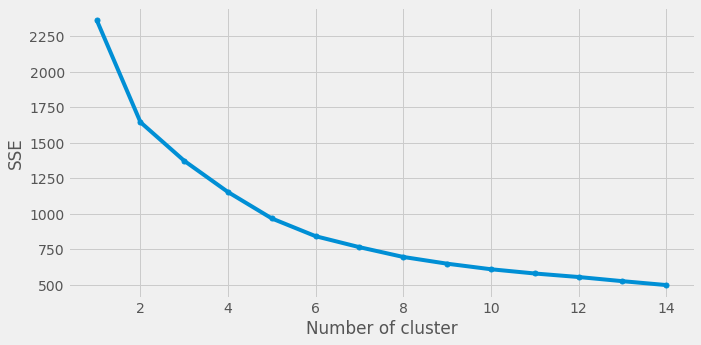

In [282]:
max_clusters = 15 # Set max clusters arbitrarily at 15.

#Find the optimal number of centroids
sse = {}
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_clean)
#     df_clean.loc['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()),solid_joinstyle='round',marker='.',markersize =10)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [283]:
# The k-means problem - provided by scikit-learn is solved using either Lloyd’s or Elkan’s algorithm.
kmeans = KMeans(n_clusters=6, max_iter=500, n_init=25, random_state=1)
result = kmeans.fit(df_clean)
result

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=25, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [284]:
# Which row/case is belongs to which cluster
labels = kmeans.predict(df_clean)

In [285]:
# Where the centroids were so that we can see them in the graph
centroids = kmeans.cluster_centers_

In [286]:
labels.shape

(668,)

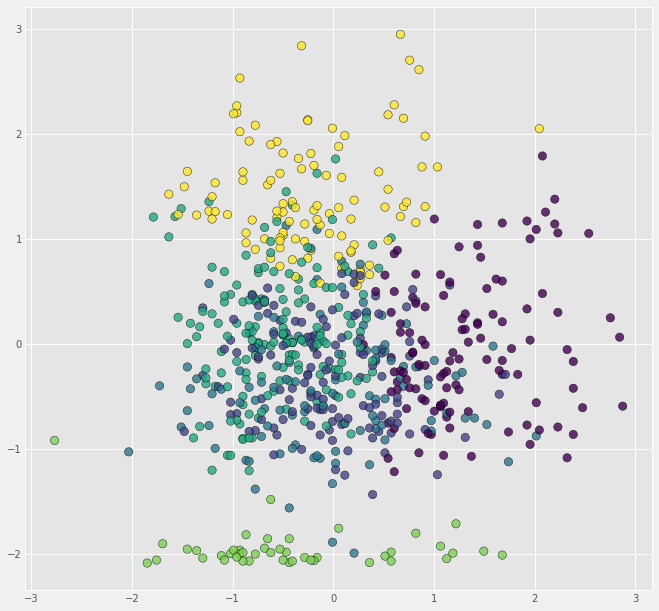

In [289]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(df_clean['Fashion'], df_clean['Stretch'],c=labels, alpha=0.8, edgecolor='k', s=70, marker="o")
plt.show()

In [288]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
